<a href="https://colab.research.google.com/github/quantaosun/Magpie/blob/main/Magpie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Standard binding free energy calculation with OpenMM via Protein-ligand Alchemical Transformation Simulation.

## Credits

*   This notebook relies on the AToM-OpenMM plugin developed by Gallicchio-Lab (https://github.com/Gallicchio-Lab/AToM-OpenMM)

*   This notebook relies on OpenMM as the back-end simulation engine. (https://openmm.org/)

*  The input files for this notebook are processed by the Making-it-rain. (https://github.com/pablo-arantes/Making-it-rain)
* Openbabel and Ambertools.(https://ambermd.org/AmberTools.php; http://openbabel.org/wiki/Main_Page)
*  Analysis relies on UWHAM package in R.(https://github.com/patvarilly/uwham;   
https://www.r-project.org/)

* Conda open source package management system. (https://docs.conda.io/en/latest/)






#### ⚠️Run all commands in the terminal, with this notebook as reference⚠️

The notebook is under development, there might be some bugs stopping the simulation.

## Why use this?

1. **GOOD accuracy.** The theory behind this calculation is solid, see reference for more.

2. **EASY to operate.** You don't have to buy or install anything on your local computer.

3. **REASONABLE time.** A ΔG value for one protein-ligand needs around 12-24 hours. 







In [ ]:
#@title Import drive
from google.colab import drive
drive.flush_and_unmount
drive.mount('/content/drive',force_remount=True)

In [ ]:
#@title Install conda 3.7
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.12.0-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.12.0-Linux-x86_64.sh -b -f -p /root/miniconda3 2>&1 1>/dev/null

In [ ]:
#@title Install dependencies
%%bash
conda install -c anaconda configobj -y
conda install -c conda-forge openbabel -y
conda install -c conda-forge ambertools
#@title  Install vim
!apt-get install vim 2>&1 1>/dev/null

In [ ]:
#@title Install the AToM software
%%bash
conda install -c omnia openmm -y
conda install -c conda-forge openmm-atmmetaforce-plugin -y
git clone https://github.com/Gallicchio-Lab/AToM-OpenMM.git
cd AToM-OpenMM
python setup.py install

### Place input files

It is highly recommended to use making-it-rain to generate your ligand.mol2 and receptor (SYS_nw.pdb) file, then use grep -v to delete LIG.


In [ ]:
%%bash
# Go to workding directory
cd examples/ABFE/fkbp

# Change original directory to old names, 
mv ligands ligands_old
mv receptor receptor_old

# build new folder with same name.

mdkir ligands receptor

# Copy Making-it-rain ligand.mol2 and SYS_nw.pdb to 
# ligands and receptor directory, respectively.
cp ligand.mol2 ligands/
cp SYS_nw.pdb receptor/

# Get rid of LIG to obtain a protein only file.
# rename the file to fkbp.pdb
cd receptor/
grep -v LIG SYS_nw.pdb > fkbp.pdb
rm SYS_nw.pdb

### Scripts setup

In [ ]:
!cp scripts/setup-atm.sh .

In [ ]:
bash ./setup-atm.sh

### Minimization,npt,equilibration

In [ ]:
%cd complexes/fkbp-thi

In [ ]:
!python fkbp-thi_mintherm.py 

In [ ]:
!python fkbp-thi_equil.py 

### Intermediate lambda simulation

In [ ]:
!python fkbp-thi_mdlambda.py

### Sampling 



```
Modify the direction vector acoording to your system. Assume the binding site is B.
We want to change from B to B1, an inproper vector like B2 is not good.

modify DISPLACEMENT = ' 22.0, 22.0, 22.0 ' to a different vector.
```



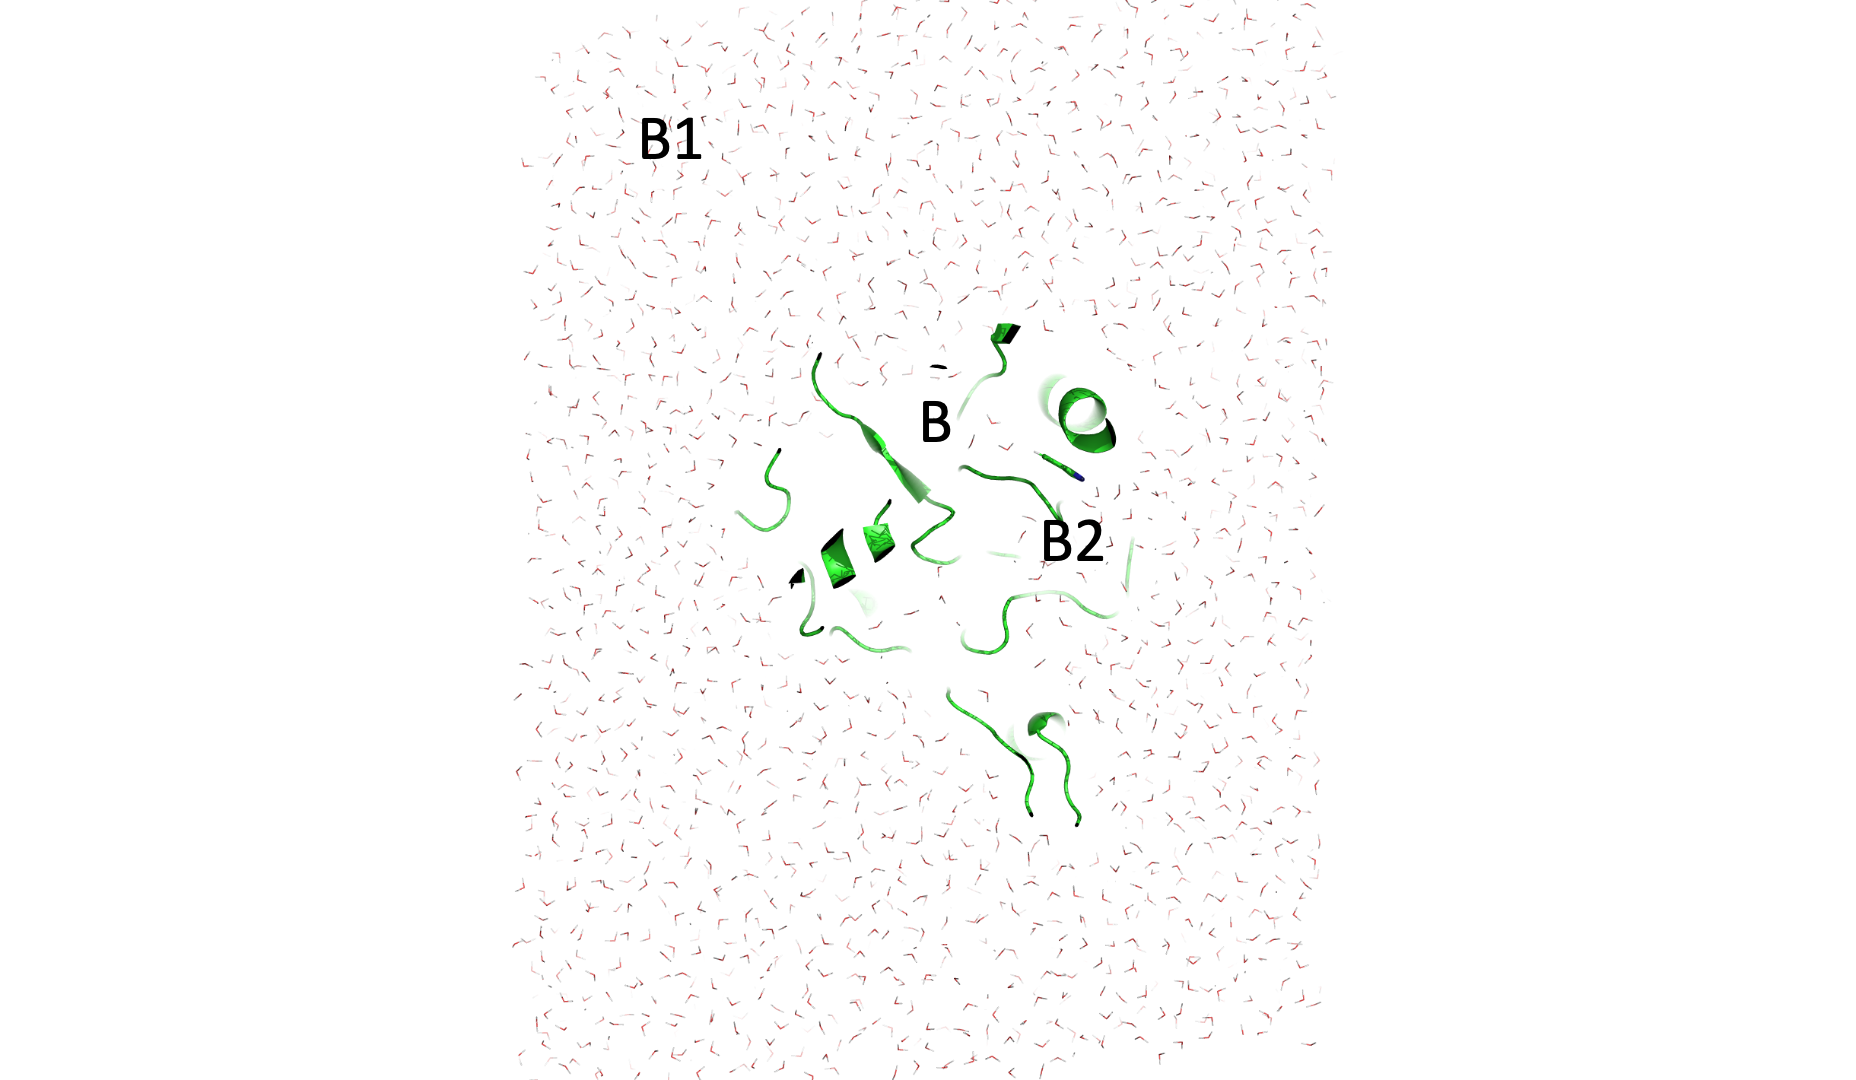

In [ ]:
!python ../../../../../abfe_explicit.py fkbp-thi_asyncre.cntl

### Analysis

In [ ]:
# activate R magic
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("UWHAM") 


Modify the lower boundary to discard some initial samples in the analyze.sh file.
```
if [ $# -eq 0 ] 
then
    discard_samples_low=20
    discard_samples_high=$many
else
```



In [ ]:
!bash ./analyze.sh

 [What we got here is NOT standard binding free energy, see this papaer](https://pubs.acs.org/doi/10.1021/acs.jctc.1c00266)


*  The difference is about,0.87 kcal/mol 
*  Final result = DGb + 0.87 


 


## References
1.  J. Chem. Inf. Model. 2022, 62, 2, 309–323
Publication Date:January 6, 2022
https://doi.org/10.1021/acs.jcim.1c01129

2.   . Chem. Theory Comput. 2021, 17, 6, 3309–3319
Publication Date:May 13, 2021
https://doi.org/10.1021/acs.jctc.1c00266
3.  Asynchronous Replica Exchange Software for Grid and Heterogeneous Computing https://doi.org/10.1016/j.cpc.2015.06.010 
 


In [ ]:
while True:pass